**Name:**Tanvir Ahmed Apu

**Id:** 212 505 1045


**Course Code:** CSE 438  
**Course Title:** Digital Image Processing Lab  
**Section:** 8A

**Department of Computer Science & Engineering**

In [129]:
import numpy as np
import cv2
import requests
import matplotlib.pyplot as plt

In [130]:
# Step 1: Read grayscale image from URL
url = "https://images.pexels.com/photos/463734/pexels-photo-463734.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
response = requests.get(url)
image_arr = np.frombuffer(response.content, np.uint8)
image = cv2.imdecode(image_arr, cv2.IMREAD_GRAYSCALE)

In [131]:
# Step 2: Define kernel and normalize it
kernel = np.array([
    [1, 1, 1],
    [1, 2, 1],
    [1, 1, 1]
], dtype=np.float32)
kernel_sum = np.sum(kernel)
kernel = kernel / kernel_sum

In [132]:
# Step 3: Apply the filter manually
h, w = image.shape
kh, kw = kernel.shape
pad_h, pad_w = kh // 2, kw // 2

# Pad the image
padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')

# Initialize an output array
filtere_manual = np.zeros_like(image, dtype=np.float32)

# Apply convolution manually
for i in range(h):
    for j in range(w):
        region = padded_image[i:i+kh, j:j+kw]
        filtered_manual[i, j] = np.sum(region * kernel)

filtered_manual = np.clip(filtered_manual, 0, 255).astype(np.uint8)

In [133]:
# Step 4: Apply the filter using cv2.filter2D
filtered_cv2 = cv2.filter2D(image, -1, kernel)

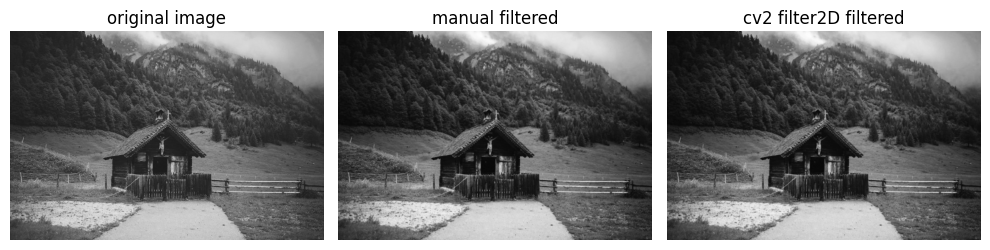

In [134]:
# Step 5: Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_manual, cmap='gray')
plt.title("manual filtered")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_cv2, cmap='gray')
plt.title("cv2 filter2D filtered")
plt.axis('off')

plt.tight_layout()
plt.show()